In [53]:
import numpy as np
from numpy import ma
import math
import scipy
import os
from IPython.display import Image
from tqdm import tqdm

from netCDF4 import Dataset

from cartopy import config
import cartopy.crs as ccrs
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from cartopy.util import add_cyclic_point

import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib.cm import get_cmap
from matplotlib import ticker

# from matplotlib.mlab import bivariate_normal

NA = 6.022e+23

In [54]:
# 2*2.5
FILEDIR1_1day = '/n/home12/hongwei/HONGWEI/GC_run_13.0/gc_2x25_aerosol_compare_Eulerian'
NcFile1_1day = Dataset(FILEDIR1_1day+'/OutputDir/GEOSChem.SpeciesConc.20110101_0010z.nc4','r',format='NETCDF4_CLASSIC')

lat1_1day   = NcFile1_1day.variables['lat'][:]
lon1_1day   = NcFile1_1day.variables['lon'][:]
EU1_1day   = NcFile1_1day.variables['SpeciesConc_PASV_EU'][0,:,:,:]

GC_AREA1_1day = NcFile1_1day.variables['AREA'][:,:];



# lagrange: 2*2.5
FILEDIR0_1day = '/n/home12/hongwei/HONGWEI/GC_run_13.0/gc_2x25_aerosol_compare_lagrange'
NcFile0_1day  = Dataset(FILEDIR0_1day+'/OutputDir/GEOSChem.SpeciesConc.20110101_0010z.nc4','r',format='NETCDF4_CLASSIC')

lat0_1day   = NcFile0_1day.variables['lat'][:]
lon0_1day   = NcFile0_1day.variables['lon'][:]
LA0_1day    = NcFile0_1day.variables['SpeciesConc_PASV_LA'][0,:,:,:]
LA03_1day   = NcFile0_1day.variables['SpeciesConc_PASV_LA3'][0,:,:,:]

LA0_1day = LA0_1day + LA03_1day

GC_AREA0_1day = NcFile0_1day.variables['AREA'][:,:];

EU1_1day.shape

(72, 91, 144)

In [55]:
del NcFile1_1day, NcFile0_1day

In [56]:
# 2*2.5
FILEDIR1_1mon = '/n/home12/hongwei/HONGWEI/GC_run_13.0/gc_2x25_aerosol_compare_Eulerian'
NcFile1_1mon = Dataset(FILEDIR1_1mon+'/OutputDir/GEOSChem.SpeciesConc.20110201_0000z.nc4','r',format='NETCDF4_CLASSIC')

lat1_1mon  = NcFile1_1mon.variables['lat'][:]
lon1_1mon  = NcFile1_1mon.variables['lon'][:]
EU1_1mon   = NcFile1_1mon.variables['SpeciesConc_PASV_EU'][0,:,:,:]

GC_AREA1_1mon = NcFile1_1mon.variables['AREA'][:,:];



# lagrange: 2*2.5
FILEDIR0_1mon = '/n/home12/hongwei/HONGWEI/GC_run_13.0/gc_2x25_aerosol_compare_lagrange'
NcFile0_1mon  = Dataset(FILEDIR0_1mon+'/OutputDir/GEOSChem.SpeciesConc.20110201_0000z.nc4','r',format='NETCDF4_CLASSIC')

lat0_1mon   = NcFile0_1mon.variables['lat'][:]
lon0_1mon   = NcFile0_1mon.variables['lon'][:]
LA0_1mon    = NcFile0_1mon.variables['SpeciesConc_PASV_LA'][0,:,:,:]
LA03_1mon   = NcFile0_1mon.variables['SpeciesConc_PASV_LA3'][0,:,:,:]

LA0_1mon = LA0_1mon + LA03_1mon

GC_AREA0_1mon = NcFile0_1mon.variables['AREA'][:,:];

EU1_1mon.shape

(72, 91, 144)

In [57]:
del NcFile1_1mon, NcFile0_1mon

In [58]:
# 2*2.5
FILEDIR1_1year = '/n/home12/hongwei/HONGWEI/GC_run_13.0/gc_2x25_aerosol_compare_Eulerian'
NcFile1_1year = Dataset(FILEDIR1_1year+'/OutputDir/GEOSChem.SpeciesConc.20120101_0000z.nc4','r',format='NETCDF4_CLASSIC')

lat1_1year  = NcFile1_1year.variables['lat'][:]
lon1_1year  = NcFile1_1year.variables['lon'][:]
EU1_1year   = NcFile1_1year.variables['SpeciesConc_PASV_EU'][0,:,:,:]

GC_AREA1_1year = NcFile1_1year.variables['AREA'][:,:];



# lagrange: 2*2.5
FILEDIR0_1year = '/n/home12/hongwei/HONGWEI/GC_run_13.0/gc_2x25_aerosol_compare_lagrange'
NcFile0_1year  = Dataset(FILEDIR0_1year+'/OutputDir/GEOSChem.SpeciesConc.20120101_0000z.nc4','r',format='NETCDF4_CLASSIC')

lat0_1year   = NcFile0_1year.variables['lat'][:]
lon0_1year   = NcFile0_1year.variables['lon'][:]
LA0_1year    = NcFile0_1year.variables['SpeciesConc_PASV_LA'][0,:,:,:]
LA03_1year   = NcFile0_1year.variables['SpeciesConc_PASV_LA3'][0,:,:,:]

LA0_1year = LA0_1year + LA03_1year

GC_AREA0_1year = NcFile0_1year.variables['AREA'][:,:];

EU1_1year.shape

(72, 91, 144)

In [59]:
del NcFile1_1year, NcFile0_1year

In [60]:
#------------------------------------------------
# total air mass in each grid  ------------------
#------------------------------------------------
            

# 2x2.5         
AD_file1 = open(FILEDIR1_1day+'/State_Met_AD.txt','r')

GC_AD1 = EU1_1day[:,:,:]*0.0

Nx1 = len(EU1_1day[0,0,:])
Ny1 = len(EU1_1day[0,:,0])
Nz1 = len(EU1_1day[:,0,0])

for ix in range(Nx1):
    for iy in range(Ny1):
        for iz in range(Nz1):
            line = AD_file1.readline()
            GC_AD1[iz,iy,ix] = float(line)
            
            

# Lagrange: 2x2.5          
AD_file0 = open(FILEDIR0_1day+'/State_Met_AD.txt','r')

GC_AD0 = LA0_1day[:,:,:]*0.0

Nx0 = len(LA0_1day[0,0,:])
Ny0 = len(LA0_1day[0,:,0])
Nz0 = len(LA0_1day[:,0,0])

for ix in range(Nx0):
    for iy in range(Ny0):
        for iz in range(Nz0):
            line = AD_file0.readline()
            GC_AD0[iz,iy,ix] = float(line)

In [61]:
del AD_file0, AD_file1


In [62]:
### change unit, do average 

# 2.0x2.5
EU1_1day_molec = EU1_1day[:,:,:]*(GC_AD1[:,:,:]*1000.0/28.97)*NA # [mol/mol] to [molec]
    
EU1_1day_Zsum = np.sum(EU1_1day_molec[:,:,:], axis=0)
EU1_1day_Zsum[:,:] = EU1_1day_Zsum[:,:]/GC_AREA1_1day[:,:]/1e4 # [molec/cm2]
     
EU1_1day_Zsum_Xmean = np.mean(EU1_1day_Zsum[:,:], axis=1)

print( np.sum(EU1_1day_molec[:,:,:]) )


# lagrange: 2.0x2.5
LA0_1day_molec = LA0_1day[:,:,:]*(GC_AD0[:,:,:]*1000.0/28.97)*NA

LA0_1day_Zsum = np.sum(LA0_1day_molec[:,:,:], axis=0)
LA0_1day_Zsum[:,:]  = LA0_1day_Zsum[:,:]/GC_AREA0_1day[:,:]/1e4
    
LA0_1day_Zsum_Xmean = np.mean(LA0_1day_Zsum[:,:], axis=1)

print( np.sum(LA0_1day_molec[:,:,:]) )


3.5034042e+30
3.503755e+30


In [63]:
### change unit, do average 

# 2.0x2.5
EU1_1mon_molec = EU1_1mon[:,:,:]*(GC_AD1[:,:,:]*1000.0/28.97)*NA # [mol/mol] to [molec]
    
EU1_1mon_Zsum = np.sum(EU1_1mon_molec[:,:,:], axis=0)
EU1_1mon_Zsum[:,:] = EU1_1mon_Zsum[:,:]/GC_AREA1_1mon[:,:]/1e4 # [molec/cm2]
     
EU1_1mon_Zsum_Xmean = np.mean(EU1_1mon_Zsum[:,:], axis=1)

print( np.sum(EU1_1mon_molec[:,:,:]) )


# lagrange: 2.0x2.5
LA0_1mon_molec = LA0_1mon[:,:,:]*(GC_AD0[:,:,:]*1000.0/28.97)*NA

LA0_1mon_Zsum = np.sum(LA0_1mon_molec[:,:,:], axis=0)
LA0_1mon_Zsum[:,:]  = LA0_1mon_Zsum[:,:]/GC_AREA0_1mon[:,:]/1e4
    
LA0_1mon_Zsum_Xmean = np.mean(LA0_1mon_Zsum[:,:], axis=1)

print( np.sum(LA0_1mon_molec[:,:,:]) )

1.0684997e+32
1.072126e+32


In [64]:
### change unit, do average 

# 2.0x2.5
EU1_1year_molec = EU1_1year[:,:,:]*(GC_AD1[:,:,:]*1000.0/28.97)*NA # [mol/mol] to [molec]
    
EU1_1year_Zsum = np.sum(EU1_1year_molec[:,:,:], axis=0)
EU1_1year_Zsum[:,:] = EU1_1year_Zsum[:,:]/GC_AREA1_1year[:,:]/1e4 # [molec/cm2]
     
EU1_1year_Zsum_Xmean = np.mean(EU1_1year_Zsum[:,:], axis=1)

print( np.sum(EU1_1year_molec[:,:,:]) )


# lagrange: 2.0x2.5
LA0_1year_molec = LA0_1year[:,:,:]*(GC_AD0[:,:,:]*1000.0/28.97)*NA

LA0_1year_Zsum = np.sum(LA0_1year_molec[:,:,:], axis=0)
LA0_1year_Zsum[:,:]  = LA0_1year_Zsum[:,:]/GC_AREA0_1year[:,:]/1e4
    
LA0_1year_Zsum_Xmean = np.mean(LA0_1year_Zsum[:,:], axis=1)

print( np.sum(LA0_1year_molec[:,:,:]) )

1.0605288e+33
1.0566605e+33


Total mass [molec] in the end: 
GEOS-Chem         = 5.348234564223369e+18
plume model 2*2.5 = 1.3371108678581617e+18


181

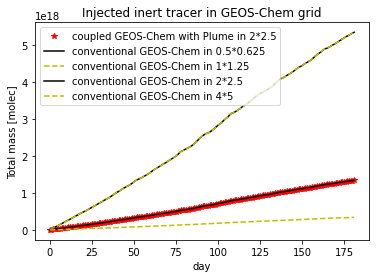

In [10]:


# t = Nt1-1
# print(f'Total mass [molec] in the end: ')
# print(f'GEOS-Chem         = {np.sum(EU1_Zsum[t,:,:])}')
# print(f'plume model 2*2.5 = {np.sum(LA0_Zsum[t,:,:])}')

# LA0_mass = [0]
# EU1_mass = [0]
# EU2_mass = [0]
# EU3_mass = [0]
# EU4_mass = [0]

# days = [0]

# for i in range(Nt1):
#     days.append(i+1);
#     LA0_mass.append(np.sum(LA0_Zsum[i,:,:]))
#     EU1_mass.append(np.sum(EU1_Zsum[i,:,:]))
#     EU2_mass.append(np.sum(EU2_Zsum[i,:,:]))
#     EU3_mass.append(np.sum(EU3_Zsum[i,:,:]))
#     EU4_mass.append(np.sum(EU4_Zsum[i,:,:]))
    
# plt.plot(days, LA0_mass, 'r*', label='coupled GEOS-Chem with Plume in 2*2.5');

# plt.plot(days, EU1_mass, 'k', label='conventional GEOS-Chem in 0.5*0.625');
# plt.plot(days, EU2_mass, 'y--', label='conventional GEOS-Chem in 1*1.25');
# plt.plot(days, EU3_mass, 'k', label='conventional GEOS-Chem in 2*2.5');
# plt.plot(days, EU4_mass, 'y--', label='conventional GEOS-Chem in 4*5');

# plt.title('Injected inert tracer in GEOS-Chem grid');
# plt.xlabel('day');
# plt.ylabel('Total mass [molec]');
# plt.legend();

# days[-1]

In [118]:
# plot  -----------------------------------------
#------------------------------------------------

# time step for ploting is 24 hours (once every day)


fig = plt.figure(figsize=(20,9));
#     gs = fig.add_gridspec(15, 8)
# plt.suptitle('Day: '+str(i+1), fontsize=16);
    

# 1day

X_max = 1.1*np.max(LA0_1day_Zsum_Xmean[:],axis=(0)) # 16.5e+11;
levels = np.arange(0.5e12,5e12,0.5e12)
norm = colors.BoundaryNorm(boundaries=levels, ncolors=256)

# (1) for Lagrange ============================================================
projection=ccrs.PlateCarree()
ax1 = plt.subplot(3, 3, 1, projection=ccrs.PlateCarree());
ax1.set_global()
    
ax1.gridlines(x_inline=True)    
ax1.set_xticks(np.linspace(-180, 180, 7), crs=projection)
ax1.set_yticks(np.linspace(-90, 90, 7), crs=projection)
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax1.xaxis.set_major_formatter(lon_formatter)
ax1.yaxis.set_major_formatter(lat_formatter)
    

#     z = ma.masked_where(LA_Zsum[i,:,:] <= 1e-10, LA_Zsum[i,:,:])
norm = colors.BoundaryNorm(boundaries=levels, ncolors=256)
    
data = LA0_1day_Zsum[:,:]
cyclic_data = add_cyclic_point(data)
data, lon1_cyclic = add_cyclic_point(data, coord=lon1_1day)
    
ax1_contours = ax1.contourf(lon1_cyclic, lat1_1day, data, levels=levels, norm=norm,\
                                transform=ccrs.PlateCarree(), cmap=get_cmap("Reds"), extend="max");
    
cb1 = plt.colorbar(ax1_contours, ax=ax1)
cb1.ax.tick_params(labelsize=11)
cb1.set_label('[molec/cm2]')
    
ax1.coastlines();
ax1.set_title('Lagrangian (2*2.5)', fontsize=11);

# (2) for Eulerian ============================================================
projection=ccrs.PlateCarree()
ax2 = plt.subplot(3, 3, 2, projection=ccrs.PlateCarree());
ax2.set_global()
    
ax2.gridlines(x_inline=True)    
ax2.set_xticks(np.linspace(-180, 180, 7), crs=projection)
ax2.set_yticks(np.linspace(-90, 90, 7), crs=projection)
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax2.xaxis.set_major_formatter(lon_formatter)
ax2.yaxis.set_major_formatter(lat_formatter)
    

#     z = ma.masked_where(LA_Zsum[i,:,:] <= 1e-10, LA_Zsum[i,:,:])    
data = EU1_1day_Zsum[:,:]
cyclic_data = add_cyclic_point(data)
data, lon1_cyclic = add_cyclic_point(data, coord=lon1_1day)
    
ax2_contours = ax2.contourf(lon1_cyclic, lat1_1day, data, levels=levels, norm=norm,\
                                transform=ccrs.PlateCarree(), cmap=get_cmap("Reds"), extend="max");
    
cb2 = plt.colorbar(ax2_contours, ax=ax2)
cb2.ax.tick_params(labelsize=11)
cb2.set_label('[molec/cm2]')
    
ax2.coastlines();
ax2.set_title('Eulerian (2*2.5)', fontsize=11);
    
# (3) zonal mean: ==============================================
ax3 = plt.subplot(3,3,3);
    
ax3.plot(LA0_1day_Zsum_Xmean[:], lat0_1day, 'r-', label='Lagrange: 2*2.5');
ax3.plot(EU1_1day_Zsum_Xmean[:], lat1_1day, color='b', linestyle='-', alpha=0.7, label='Eulerian: 2x2.5');

ax3.set_xlim(0,X_max);
ax3.set_ylim(-90,90);
ax3.set_ylabel('Latitude (deg)');
ax3.tick_params(axis='x', labelsize=11)  # to Set Matplotlib Tick Labels Font Size
ax3.tick_params(axis='y', labelsize=11)
ax3.legend();
# ax3.set_title('Lagrangian', fontsize=11);
    
    
# 1mon
    
X_max = 1.1*np.max(LA0_1mon_Zsum_Xmean[:],axis=(0)) # 16.5e+11;    
levels = np.arange(0.5e13,5e13,0.5e13)
norm = colors.BoundaryNorm(boundaries=levels, ncolors=256)

# (4) for LA ==================================================================
ax4 = plt.subplot(3, 3, 4, projection=ccrs.PlateCarree());
ax4.set_global()
    
ax4.gridlines(x_inline=True)    
ax4.set_xticks(np.linspace(-180, 180, 7), crs=projection)
ax4.set_yticks(np.linspace(-90, 90, 7), crs=projection)
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax4.xaxis.set_major_formatter(lon_formatter)
ax4.yaxis.set_major_formatter(lat_formatter)
    
#     z = ma.masked_where(EU_Zsum[i,:,:] <= 1e-5, EU_Zsum[i,:,:])
data = LA0_1mon_Zsum[:,:]
cyclic_data = add_cyclic_point(data)
data, lon2_cyclic = add_cyclic_point(data, coord=lon0_1mon)
    
ax4_contours = ax4.contourf(lon2_cyclic, lat0_1mon, data, levels=levels, norm=norm,\
                                transform=ccrs.PlateCarree(), cmap=get_cmap("Reds"), extend="max");


cb4 = plt.colorbar(ax4_contours, ax=ax4)
cb4.ax.tick_params(labelsize=11)
cb4.set_label('[molec/cm2]')
    
ax4.coastlines();
ax4.set_title('Lagrangian 2x2.5', fontsize=11);
 
# (5) for EU ==================================================================
ax5 = plt.subplot(3, 3, 5, projection=ccrs.PlateCarree());
ax5.set_global()
    
ax5.gridlines(x_inline=True)    
ax5.set_xticks(np.linspace(-180, 180, 7), crs=projection)
ax5.set_yticks(np.linspace(-90, 90, 7), crs=projection)
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax5.xaxis.set_major_formatter(lon_formatter)
ax5.yaxis.set_major_formatter(lat_formatter)
    
#     z = ma.masked_where(EU_Zsum[i,:,:] <= 1e-5, EU_Zsum[i,:,:])
data = EU1_1mon_Zsum[:,:]
cyclic_data = add_cyclic_point(data)
data, lon2_cyclic = add_cyclic_point(data, coord=lon1_1mon)
    
ax5_contours = ax5.contourf(lon2_cyclic, lat1_1mon, data, levels=levels, norm=norm,\
                                transform=ccrs.PlateCarree(), cmap=get_cmap("Reds"), extend="max");


cb5 = plt.colorbar(ax5_contours, ax=ax5)
cb5.ax.tick_params(labelsize=11)
cb5.set_label('[molec/cm2]')
    
ax5.coastlines();
ax5.set_title('Eulerian 2x2.5', fontsize=11);
    
    
# (6) for GOES distribution ===================================================
    
ax6 = plt.subplot(3,3,6);
    
ax6.plot(EU1_1mon_Zsum_Xmean[:], lat1_1mon, 'r-', label='Eulerian: 2x2.5');
ax6.plot(LA0_1mon_Zsum_Xmean[:], lat0_1mon, color='gray', linestyle='-', alpha=0.7, label='Lagrangian: 2x2.5');
    
    
ax6.set_xlim(0,X_max);
ax6.set_ylim(-90,90);
ax6.set_xlabel('Tracer Concentration [molec/cm2]');
ax6.set_ylabel('Latitude (deg)');
ax6.tick_params(axis='x', labelsize=11)  # to Set Matplotlib Tick Labels Font Size
ax6.tick_params(axis='y', labelsize=11)
ax6.legend()
# ax6.set_title('Eulerian', fontsize=11);
    
    
# 1 year
    
X_max = 1.1*np.max(LA0_1year_Zsum_Xmean[:],axis=(0)) # 16.5e+11;    
levels = np.arange(0.5e14,5e14,0.5e14)
norm = colors.BoundaryNorm(boundaries=levels, ncolors=256)

# (7) for LA ==================================================================
ax7 = plt.subplot(3, 3, 7, projection=ccrs.PlateCarree());
ax7.set_global()
    
ax7.gridlines(x_inline=True)    
ax7.set_xticks(np.linspace(-180, 180, 7), crs=projection)
ax7.set_yticks(np.linspace(-90, 90, 7), crs=projection)
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax7.xaxis.set_major_formatter(lon_formatter)
ax7.yaxis.set_major_formatter(lat_formatter)
    
#     z = ma.masked_where(EU_Zsum[i,:,:] <= 1e-5, EU_Zsum[i,:,:])
data = LA0_1year_Zsum[:,:]
cyclic_data = add_cyclic_point(data)
data, lon2_cyclic = add_cyclic_point(data, coord=lon0_1year)
    
ax7_contours = ax7.contourf(lon2_cyclic, lat0_1year, data, levels=levels, norm=norm,\
                                transform=ccrs.PlateCarree(), cmap=get_cmap("Reds"), extend="max");


cb7 = plt.colorbar(ax7_contours, ax=ax7)
cb7.ax.tick_params(labelsize=11)
cb7.set_label('[molec/cm2]')
    
ax7.coastlines();
ax7.set_title('LA (2*2.5)', fontsize=11);
    
# (8) for EU ==================================================================
ax8 = plt.subplot(3, 3, 8, projection=ccrs.PlateCarree());
ax8.set_global()
    
ax8.gridlines(x_inline=True)    
ax8.set_xticks(np.linspace(-180, 180, 7), crs=projection)
ax8.set_yticks(np.linspace(-90, 90, 7), crs=projection)
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax8.xaxis.set_major_formatter(lon_formatter)
ax8.yaxis.set_major_formatter(lat_formatter)
    
#     z = ma.masked_where(EU_Zsum[i,:,:] <= 1e-5, EU_Zsum[i,:,:])
data = EU1_1year_Zsum[:,:]
cyclic_data = add_cyclic_point(data)
data, lon2_cyclic = add_cyclic_point(data, coord=lon1_1year)
    
ax8_contours = ax8.contourf(lon2_cyclic, lat1_1year, data, levels=levels, norm=norm,\
                                transform=ccrs.PlateCarree(), cmap=get_cmap("Reds"), extend="max");


cb8 = plt.colorbar(ax8_contours, ax=ax8)
cb8.ax.tick_params(labelsize=11)
cb8.set_label('[molec/cm2]')
    
ax8.coastlines();
ax8.set_title('EU (2*2.5)', fontsize=11);   
    
# (9) for GOES distribution ===================================================
    
ax9 = plt.subplot(3,3,9);
    
ax9.plot(EU1_1year_Zsum_Xmean[:], lat1_1year, 'r-', label='Eulerian: 2x2.5');
ax9.plot(LA0_1year_Zsum_Xmean[:], lat0_1year, color='gray', linestyle='-', alpha=0.7, label='Lagrangian: 2x2.5');
    
    
ax9.set_xlim(0,X_max);
ax9.set_ylim(-90,90);
ax9.set_xlabel('Tracer Concentration [molec/cm2]');
ax9.set_ylabel('Latitude (deg)');
ax9.tick_params(axis='x', labelsize=11)  # to Set Matplotlib Tick Labels Font Size
ax9.tick_params(axis='y', labelsize=11)
ax9.legend()
# ax9.set_title('Eulerian', fontsize=11);
    
    
plt.tight_layout()
plt.savefig('1day_1mon_1year_xy2.png', transparent=False, facecolor='w', edgecolor='w');
plt.close();
plt.clf();
plt.cla();
        
plt.close();

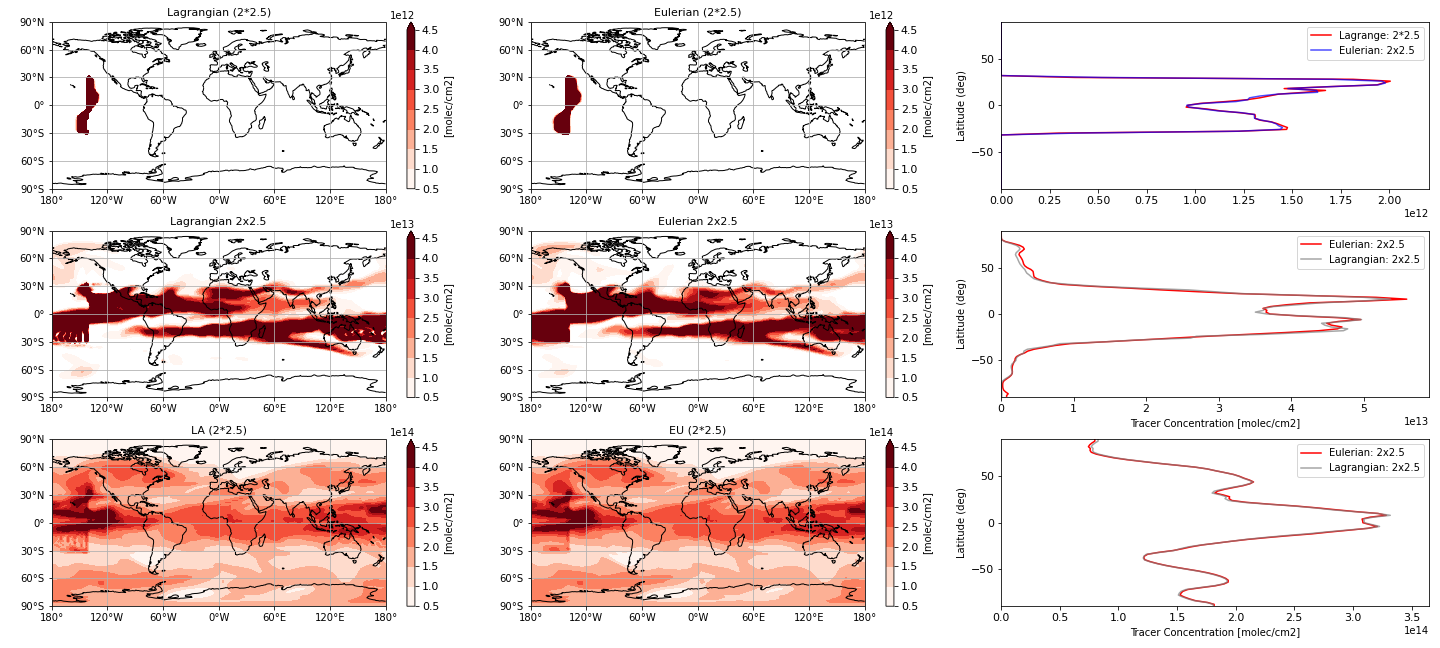

In [119]:
Image(filename=f'1day_1mon_1year_xy2.png') 

In [79]:
os.system("./png2gif2.sh")

0

In [11]:
# calculate the average and std for the curves at last time step

time = Nt1-1

# LA1_Zsum_Xmean[time,:]
# LA2_Zsum_Xmean[time,:]

# EU1_Zsum_Xmean[time,:]
# EU2_Zsum_Xmean[time,:]

LA1_mean = np.mean(LA1_Zsum_Xmean[time,:])
LA1_std = np.std(LA1_Zsum_Xmean[time,:])

LA2_mean = np.mean(LA2_Zsum_Xmean[time,:])
LA2_std = np.std(LA2_Zsum_Xmean[time,:])

EU1_mean = np.mean(EU1_Zsum_Xmean[time,:])
EU1_std = np.std(EU1_Zsum_Xmean[time,:])

EU2_mean = np.mean(EU2_Zsum_Xmean[time,:])
EU2_std = np.std(EU2_Zsum_Xmean[time,:])

NameError: name 'LA1_Zsum_Xmean' is not defined